# Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

# Summary
Peak login demand tends to occur late at night and during early-morning hours (just after midnight). Here is how we came to this conclusion.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime, timedelta

In [3]:
logins_df= pd.read_json('logins.json')

In [4]:
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
logins_df.describe()

<ipython-input-6-58c620227f57>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  logins_df.describe()


,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [7]:
logins_df.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [8]:
logins_df['login_time'].min()

Timestamp('1970-01-01 20:12:16')

# Discovered times not in order
We'll have to sort by login_time so that the times are in proper order.

In [9]:
logins_df.sort_values(by = 'login_time', inplace = True, ignore_index = True)

In [10]:
logins_df.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [11]:
logins_df.tail()

,login_time
93137,1970-04-13 18:48:52
93138,1970-04-13 18:50:19
93139,1970-04-13 18:54:02
93140,1970-04-13 18:54:23
93141,1970-04-13 18:57:38


In [12]:
logins_df['login_time'].min()

Timestamp('1970-01-01 20:12:16')

In [13]:
logins_df['login_time'].max()

Timestamp('1970-04-13 18:57:38')

# Resampling
Resampling by 15-minute intervals and getting a login_count. Then we need to rename the login_time column as login_count.

In [14]:
time_counts = logins_df.resample('15T', on = 'login_time').count()

In [15]:
time_counts.head()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [16]:
time_counts.rename(columns = {'login_time': 'login_count'}, inplace = True)

In [17]:
time_counts.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [18]:
time_counts.describe()

,login_count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [19]:
# weekly_xlabels = [time_counts.index[0]]
# next_intvl = time_counts.index[0] + timedelta(days = 7)
# while next_intvl <= time_counts.index.max():
#     weekly_xlabels.append(next_intvl)

[Text(0.5, 1.0, 'Logins (15-minute intervals)'),
 Text(0.5, 0, 'Time'),
 Text(0, 0.5, 'Number of Logins')]

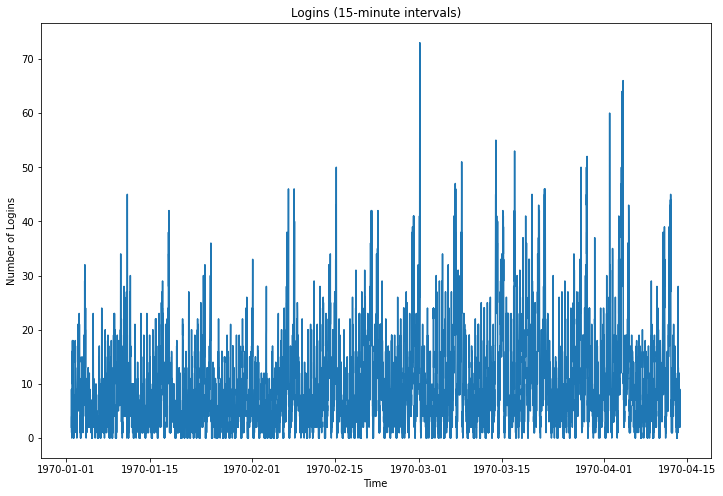

In [20]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(time_counts.index, time_counts['login_count'])
ax.set(title = 'Logins (15-minute intervals)', xlabel = 'Time', ylabel = 'Number of Logins')
# ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
# ax.set_xticklabels(weekly_xlabels, rotation=90)

# Looking for 13 or more logins
We're looking for daily trends here, so we're going to slice the time_counts dataframe to include only intervals in which there are 13 or more logins. The 75th percentile of logins is 13. We'll extract an hour column from the login_time column.

In [21]:
time_counts_high = time_counts[time_counts['login_count'] >= 13]

In [22]:
len(time_counts_high)

2692

In [23]:
time_counts_high.reset_index(inplace = True)

In [24]:
time_counts_high['hour'] = time_counts_high['login_time'].dt.hour

<ipython-input-24-75d9095b3e84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_counts_high['hour'] = time_counts_high['login_time'].dt.hour


In [25]:
time_counts_high.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692 entries, 0 to 2691
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   login_time   2692 non-null   datetime64[ns]
 1   login_count  2692 non-null   int64         
 2   hour         2692 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 63.2 KB


In [26]:
time_counts_high.head()

,login_time,login_count,hour
0,1970-01-01 23:00:00,16,23
1,1970-01-01 23:15:00,13,23
2,1970-01-01 23:30:00,14,23
3,1970-01-01 23:45:00,15,23
4,1970-01-02 00:15:00,18,0


# Histogram
This histogram tells us that peak login time happens between 9 p.m. and midnight with a slow decline after midnight. There also is a midday peak.

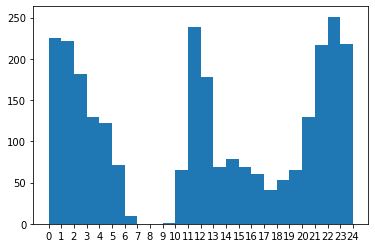

In [35]:
plt.hist(time_counts_high['hour'], bins = np.arange(0, 25))
plt.xticks(np.arange(0, 25));